In [1]:
## Importing Libraries
import numpy as np
import pandas as pd

In [2]:
# Reading data from hair_salon_no_show_wrangled_df.csv file
raw_data = pd.read_csv("/home/john/Documents/Jupyter/SMOG_DW_git/My_No_shows/Hair_Data/hair_salon_no_show_wrangled_df.csv")

In [3]:
raw_data.head()

,Unnamed: 0,book_tod,book_dow,book_category,book_staff,last_category,last_staff,last_day_services,last_receipt_tot,last_dow,...,last_prod_flag,last_cumrev,last_cumbook,last_cumstyle,last_cumcolor,last_cumprod,last_cumcancel,last_cumnoshow,noshow,recency
0,0,afternoon,Wednesday,STYLE,JJ,NaN,NaN,0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1,morning,Wednesday,COLOR,JOANNE,NaN,NaN,0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,NaN,Wednesday,STYLE,JJ,COLOR,JOANNE,2,262.0,Wednesday,...,1,262,2,1,1,2,0,0,0,35
3,3,afternoon,Thursday,STYLE,KELLY,NaN,NaN,0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
4,4,evening,Saturday,STYLE,KELLY,STYLE,KELLY,1,35.0,Thursday,...,0,35,1,1,0,0,0,0,0,9


In [4]:
# Dropping old index column "Unnamed: 0"
raw_data.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
# Checking shape of raw_data DataFrame
raw_data.shape

(1952, 21)

In [6]:
# Listing columns within DataFrame
raw_data.columns

Index(['book_tod', 'book_dow', 'book_category', 'book_staff', 'last_category',
       'last_staff', 'last_day_services', 'last_receipt_tot', 'last_dow',
       'last_tod', 'last_noshow', 'last_prod_flag', 'last_cumrev',
       'last_cumbook', 'last_cumstyle', 'last_cumcolor', 'last_cumprod',
       'last_cumcancel', 'last_cumnoshow', 'noshow', 'recency'],
      dtype='object')

## Description of columns:


**book_tod** The booking time of day.

**book_dow** The booking day-of-week.

**book_category** The booked service category (COLOR or STYLE)

**book_staff** The staff member to provide the service.

**last_day_services** The number of services provided to the client on their last visit before the current booking or today whichever is greater.

**last_noshow** Did the client no-show on their last booking before the current booking or today whichever is greater? (0 - no, 1 - yes)

**last_prod_flag** Did the client buy a retail product on their last booking before the current booking or today whichever is greater? (0 - no, 1 - yes)

**last_category** The client's last booked service category before the current booking or today whichever is greater.

**last_cumrev** The client’s cumulative service revenue as of their last booking before the current booking or today whichever is greater.

**last_cumbook** The client’s cumulative number of bookings as of their last booking before the current booking or today whichever is greater.

**last_cumstyle** The client’s cumulative number of STYLE bookings as of their last booking before the current booking or today whichever is greater.

**last_cumcolor** The client’s cumulative number of COLOR bookings as of their last booking before the current booking or today whichever is greater.

**last_cumprod** The client’s cumulative number of bookings with retail product purchases as of their last booking before the current booking or today whichever is greater.

**last_cumcancel** The client’s cumulative number of appointment cancellations as of their last booking before the current booking or today whichever is greater.

**last_cumnoshow** The client’s cumulative number of no-shows as of their last booking before the current booking or today whichever is greater.

**last_dow** The day-of-week of the client's last booking before before the current booking or today whichever is greater.

**last_receipt_tot** The amount paid by the client on their last visit before the current booking or today whichever is greater.

**last_staff** The staff member who provided the client's last service before the current booking or today whichever is greater.

**last_tod** The time-of-day of the client's last booking before the current booking or today whichever is greater.

**noshow** Did the client no-show or execute an out-of-policy cancellation for this booking? (0 - no, 1 - yes) 

**recency**The number of days since the client’s last booking before the current booking or today whichever is greater.


---

## Missing Data

In [7]:
# Checking if there are any null values in DataFrame
raw_data.isnull().values.any()

True

In [8]:
# Printing nmissing values per column
print('Missing values in data frame \n')
for i in raw_data.columns: 
    if raw_data[i].isnull().sum() != 0:
        print(i, ":",raw_data[i].isnull().sum())
print('------------------------------\nTotal number of missing values in DataFrame:',raw_data.isnull().sum().sum())

Missing values in data frame 

book_tod : 235
last_category : 949
last_staff : 949
last_dow : 949
last_tod : 1094
------------------------------
Total number of missing values in DataFrame: 4176


In [9]:
total = raw_data.isnull().sum().sort_values(ascending=False)
percent = (raw_data.isnull().sum()/raw_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(22)

,Total,Percent
last_tod,1094,0.560451
last_category,949,0.486168
last_staff,949,0.486168
last_dow,949,0.486168
book_tod,235,0.120389
book_dow,0,0.000000
book_category,0,0.000000
book_staff,0,0.000000
last_day_services,0,0.000000
last_receipt_tot,0,0.000000


**book_category** The booked service category (COLOR or STYLE)

**last_dow** The day-of-week of the client's last booking before before the current booking or today whichever is greater.

**last_staff** The staff member who provided the client's last service before the current booking or today whichever is greater.

**last_tod** The time-of-day of the client's last booking before the current booking or today whichever is greater.

In [10]:
# Checking if there are rows with all values being NaN
# .dropna(how='all') removes rows where all values are missing

raw_data.dropna(how='all').shape[0] == raw_data.shape[0]

# True - both shapes are equal, meaning there are no rows containing only missing values

True

---

## Examining dependednt variable - noshow

In [11]:
# Number of no-shows (1)
raw_data.noshow.value_counts()

0    1728
1     224
Name: noshow, dtype: int64

In [12]:
raw_data.noshow.value_counts(normalize=True)

0    0.885246
1    0.114754
Name: noshow, dtype: float64

In [13]:
# We can see here that we have unbalanced data set (like fraud data sets)
# 0    0.885246 - showed to appointment
# 1    0.114754 - didn't show to appointment

# We will have to use techniques that deal with such data sets like:
# oversampling, undersampling 
# and hybrid techniques like SMOTE (Synthetic Minority Over-sampling Technique) or ENN ( Edited Nearest Neighbors)

In [14]:
raw_data.noshow.hist(bins=2)

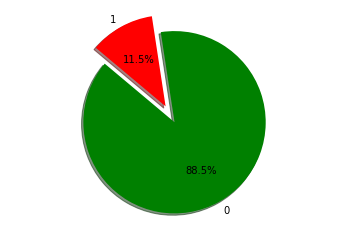

In [15]:
import matplotlib.pyplot as plt

# Data to plot
labels = raw_data['noshow'].unique()
sizes = raw_data['noshow'].value_counts().values
colors = ['green', 'red']
explode = (0.1, 0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

---

## No-shows: daytime / weekday

In [16]:
# Examining the booking day-of-week
raw_data.book_dow.value_counts()

Thursday     417
Friday       405
Saturday     393
Tuesday      391
Wednesday    291
Sunday        54
Monday         1
Name: book_dow, dtype: int64

In [17]:
# Examining the booking time-of-day
raw_data.book_tod.value_counts()

afternoon    735
morning      548
evening      434
Name: book_tod, dtype: int64

In [18]:
day_time_labels = raw_data.book_tod.value_counts().index.tolist()
# sort_key = {'morning':1, 'afternoon':2, 'evening':3}
# day_time_labels.sort(key=sort_key.get)
day_time_labels

['afternoon', 'morning', 'evening']

In [19]:
day_of_week = raw_data.book_dow.value_counts().index.tolist()
day_of_week # unsorted weekdays


['Thursday', 'Friday', 'Saturday', 'Tuesday', 'Wednesday', 'Sunday', 'Monday']

In [20]:
# Getting sorted weekdays
import calendar as cal

day_of_week_labels = [day[:3] for day in cal.day_name]
day_of_week_labels

['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [21]:
pivot_heatmap_data = pd.pivot_table(raw_data[['book_dow','book_tod','noshow']], index=['book_dow','book_tod'], aggfunc='count')
pivot_heatmap_data

noshow
book_dow  book_tod         
Friday    afternoon     145
          evening       104
          morning       110
Monday    morning         1
Saturday  afternoon     171
          evening        11
          morning       160
Sunday    afternoon      29
          evening         5
          morning        14
Thursday  afternoon     152
          evening       116
          morning        99
Tuesday   afternoon     117
          evening       134
          morning        90
Wednesday afternoon     121
          evening        64
          morning        74

In [22]:
pivot_heatmap_data_unstack = pivot_heatmap_data.unstack(level=0)
pivot_heatmap_data_unstack

noshow                                                  
book_dow  Friday Monday Saturday Sunday Thursday Tuesday Wednesday
book_tod                                                          
afternoon  145.0    NaN    171.0   29.0    152.0   117.0     121.0
evening    104.0    NaN     11.0    5.0    116.0   134.0      64.0
morning    110.0    1.0    160.0   14.0     99.0    90.0      74.0

In [23]:
# Changing the order of days of the week - reindex
pivot_heatmap_data_unstack = pivot_heatmap_data_unstack.reindex(labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], axis=1, level=1)
pivot_heatmap_data_unstack

noshow                                                  
book_dow  Monday Tuesday Wednesday Thursday Friday Saturday Sunday
book_tod                                                          
afternoon    NaN   117.0     121.0    152.0  145.0    171.0   29.0
evening      NaN   134.0      64.0    116.0  104.0     11.0    5.0
morning      1.0    90.0      74.0     99.0  110.0    160.0   14.0

In [24]:
# Sorting list  of daytime in desired manner
sort_key = {'morning':1, 'afternoon':2, 'evening':3}
index_order = raw_data.book_tod.value_counts().index.tolist()
index_order.sort(key=sort_key.get)
index_order

['morning', 'afternoon', 'evening']

In [25]:
# Changing the order of time of day - reindex
pivot_heatmap_data_unstack.index = pd.CategoricalIndex(pivot_heatmap_data_unstack.index, categories=index_order)
pivot_heatmap_data_unstack.sort_index(level=0, inplace=True)

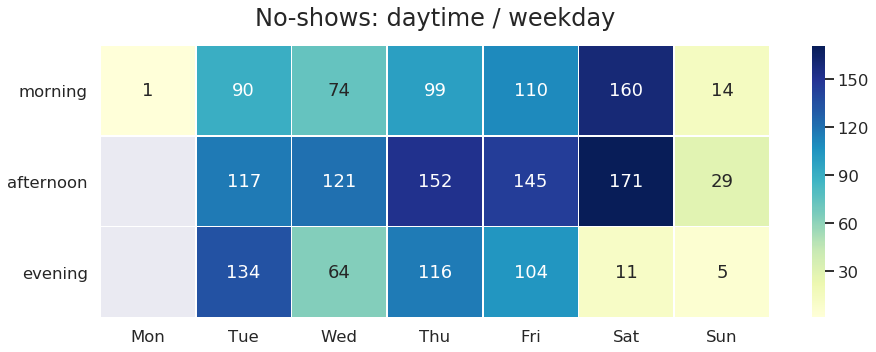

In [35]:
import seaborn as sns

sns.set_context("talk")

f, ax = plt.subplots(figsize=(15, 5))

ax = sns.heatmap(pivot_heatmap_data_unstack,
                 annot=True,
                 fmt="n",
                 linewidths=.5,
                 ax=ax,
                 xticklabels=day_of_week_labels,
                 yticklabels=index_order, cmap="YlGnBu")

ax.axes.set_title("No-shows: daytime / weekday",
                  fontsize=24,
                  y=1.01,
                  pad=20)

ax.set(xlabel=None, ylabel=None)

plt.yticks(rotation = 0);

---

## No-shows per staff

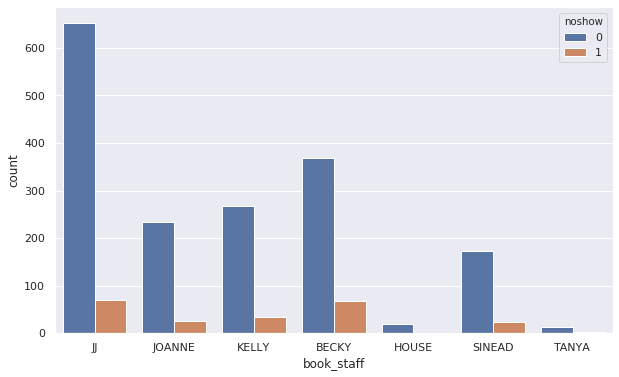

In [27]:
# Number of services provided per staff person

sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="book_staff", hue="noshow", data=raw_data)

In [28]:
# Total bookings for each staff person
total_staff_book = raw_data[['book_staff','noshow']].groupby(['book_staff']).agg(['count'])
total_staff_book['noshow']

,count
book_staff,
BECKY,436
HOUSE,20
JJ,722
JOANNE,260
KELLY,301
SINEAD,196
TANYA,17


In [29]:
# Total no-shows for each staff person
noshow_staff = raw_data[['book_staff','noshow']].groupby(['book_staff']).sum()
noshow_staff

,noshow
book_staff,
BECKY,68
HOUSE,1
JJ,69
JOANNE,25
KELLY,34
SINEAD,24
TANYA,3


---

## Feature: last_staff

In [30]:
raw_data['last_staff'].value_counts(normalize=True, dropna = False)

NaN       0.486168
JJ        0.181865
BECKY     0.116803
JOANNE    0.086578
SINEAD    0.068648
KELLY     0.049693
HOUSE     0.008197
TANYA     0.002049
Name: last_staff, dtype: float64

In [31]:
raw_data[['last_staff','noshow']].groupby(['last_staff']).agg(['mean','count'])

noshow      
                mean count
last_staff                
BECKY       0.210526   228
HOUSE       0.562500    16
JJ          0.098592   355
JOANNE      0.106509   169
KELLY       0.144330    97
SINEAD      0.126866   134
TANYA       0.000000     4

---

## Feature: book_category

In [32]:
raw_data['book_category'].value_counts()

STYLE    1531
COLOR     347
MISC       74
Name: book_category, dtype: int64

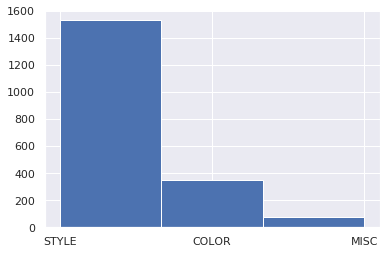

In [33]:
raw_data['book_category'].hist(bins=3)

---

## Feature correlation

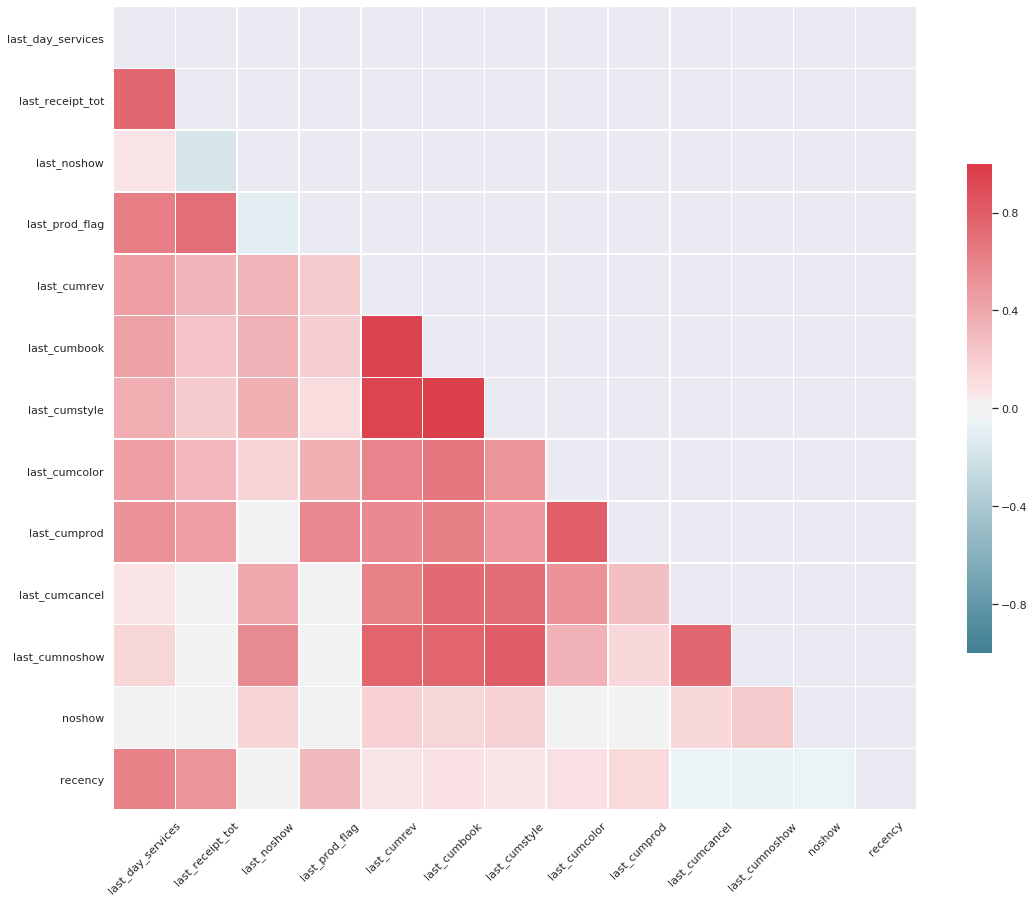

In [34]:
import seaborn as sns

# Creating heatmap feature correlation
sns.set(style="darkgrid")
corr = raw_data.corr()

# Generating a mask to cover the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Setting the size of the figure
f, ax = plt.subplots(figsize=(18,18))

# Custom color map
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            square=True, xticklabels=1, yticklabels=1,
            linewidths=0.5, cbar_kws={"shrink": 0.5}, ax=ax)

plt.xticks(rotation = 45)
plt.show()